#Cargar librerías

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

#Cargar datos

In [ ]:
df_aptos = pd.read_csv('apartamentos.csv', index_col=False)

In [ ]:
print(f"Las dimensiones del dataframe son\n:, {df_aptos.shape}")

Las dimensiones del dataframe son
:, (43013, 46)


In [ ]:
print(f'El tipo de dato de cada columna es: ')
print(df_aptos.info())

El tipo de dato de cada columna es: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43013 entries, 0 to 43012
Data columns (total 46 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   _id                      43013 non-null  object 
 1   codigo                   43013 non-null  object 
 2   tipo_propiedad           43013 non-null  object 
 3   tipo_operacion           43013 non-null  object 
 4   precio_venta             27584 non-null  float64
 5   area                     43013 non-null  float64
 6   habitaciones             43012 non-null  float64
 7   banos                    43012 non-null  float64
 8   administracion           35088 non-null  float64
 9   parqueaderos             43012 non-null  float64
 10  sector                   41372 non-null  object 
 11  estrato                  43012 non-null  float64
 12  antiguedad               43003 non-null  object 
 13  latitud                  43013 non-null

In [ ]:
#análisis de datos pérdidos en el dataset
pd.set_option('display.max_rows', None)
df_aptos.isnull().sum()

_id                            0
codigo                         0
tipo_propiedad                 0
tipo_operacion                 0
precio_venta               15429
area                           0
habitaciones                   1
banos                          1
administracion              7925
parqueaderos                   1
sector                      1641
estrato                        1
antiguedad                    10
latitud                        0
longitud                       0
direccion                  42219
descripcion                    0
website                        2
last_view                      2
datetime                       2
url                        42219
timeline                   13586
estado                       796
compañia                    4530
precio_arriendo            27184
jacuzzi                        2
piso                       43013
closets                    43013
chimenea                       2
permite_mascotas               2
gimnasio                       2
ascensor                       2
conjunto_cerrado               2
piscina                        2
salon_comunal                  2
terraza                        2
vigilancia                     2
coords_modified                0
localidad                      0
barrio                       193
estacion_tm_cercana            0
distancia_estacion_tm_m        0
is_cerca_estacion_tm           0
parque_cercano                 0
distancia_parque_m             0
is_cerca_parque                0
dtype: int64

In [ ]:
#mirar datos del dataset
df_aptos.head(5)

_id   codigo tipo_propiedad tipo_operacion  \
0  66d86c7eceda690e85508760  4133491    APARTAMENTO          VENTA   
1  66d86c7eceda690e85508761  3889852    APARTAMENTO          VENTA   
2  66d86c7eceda690e85508762  4386770    APARTAMENTO          VENTA   
3  66d86c7eceda690e85508763  4210060    APARTAMENTO          VENTA   
4  66d86c7eceda690e85508764  4063762    APARTAMENTO          VENTA   

   precio_venta  area  habitaciones  banos  administracion  parqueaderos  ...  \
0   339000000.0  76.0           3.0    2.0        300000.0           1.0  ...   
1   223000000.0  63.0           3.0    2.0             NaN           0.0  ...   
2   440898168.0  54.0           3.0    2.0        305000.0           0.0  ...   
3   158000000.0  43.0           2.0    2.0        106600.0           0.0  ...   
4   222800000.0  48.0           3.0    2.0        151000.0           0.0  ...   

  vigilancia  coords_modified     localidad                      barrio  \
0        0.0            False          SUBA              URB. PICADELLY   
1        0.0            False       USAQUEN  BARRANCAS PERLAS DEL NORTE   
2        0.0            False  LOS MARTIRES               SAN VICTORINO   
3        0.0            False          SUBA              LA ESTRELLA II   
4        0.0            False       USAQUEN          HORIZONTES USAQUEN   

   estacion_tm_cercana distancia_estacion_tm_m is_cerca_estacion_tm  \
0  Toberin - Foundever                 1142.45                    0   
1              Mazurén                 2384.89                    0   
2         De La Sabana                  232.22                    1   
3          Portal Suba                 2275.08                    0   
4             Terminal                 2099.16                    0   

                                      parque_cercano distancia_parque_m  \
0  PARQUE VECINAL DESARROLLO CANTALEJO URBANIZACI...             426.09   
1                           PARQUE ZONAL ALTA BLANCA             472.47   
2                PARQUE METROPOLITANO TERCER MILENIO             961.29   
3                            PARQUE ZONAL LA GAITANA             539.98   
4               PARQUE VECINAL DESARROLLO VERBENAL I            1661.14   

  is_cerca_parque  
0               1  
1               1  
2               0  
3               0  
4               0  

[5 rows x 46 columns]

In [ ]:
#obtener categorias de una variable del dataset
df_aptos['tipo_propiedad'].value_counts()

tipo_propiedad
APARTAMENTO                  42943
CASA CON CONJUNTO CERRADO       60
CASA                            10
Name: count, dtype: int64

In [ ]:
#obtener categorias de una variable del dataset
df_aptos['tipo_operacion'].value_counts()

tipo_operacion
VENTA               27270
ARRIENDO            15515
VENTA Y ARRIENDO      228
Name: count, dtype: int64

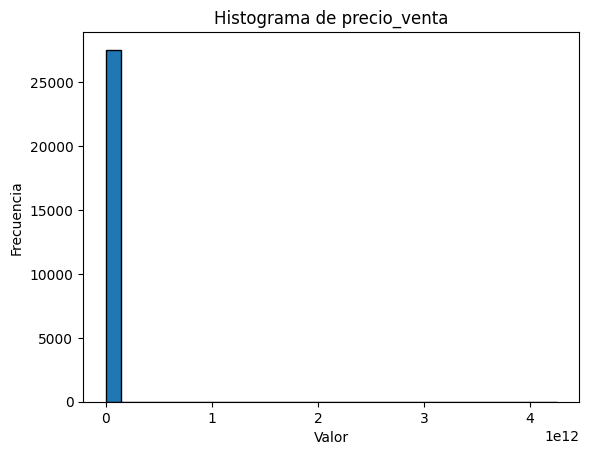

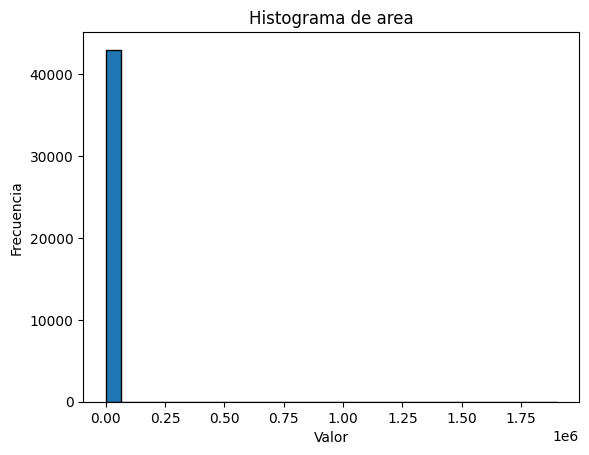

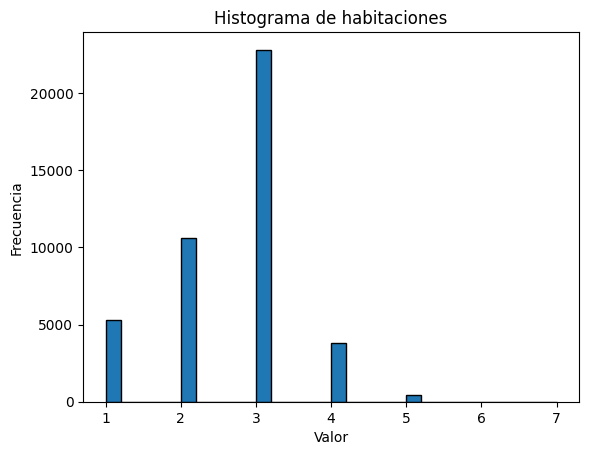

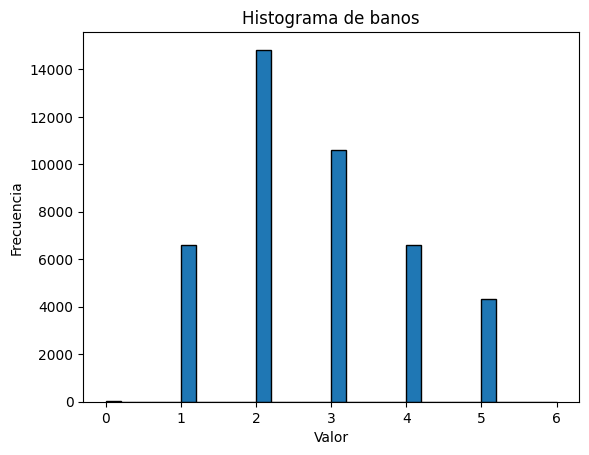

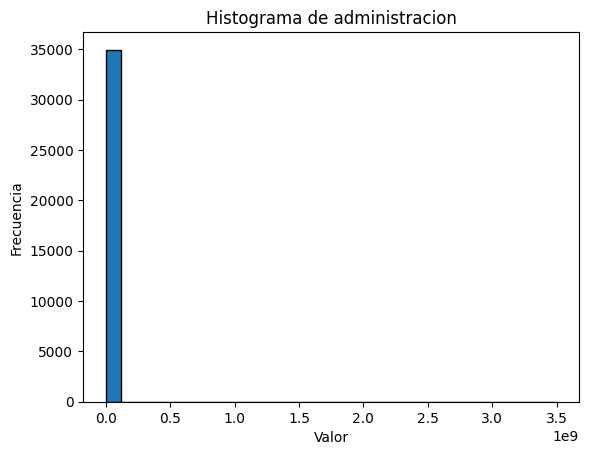

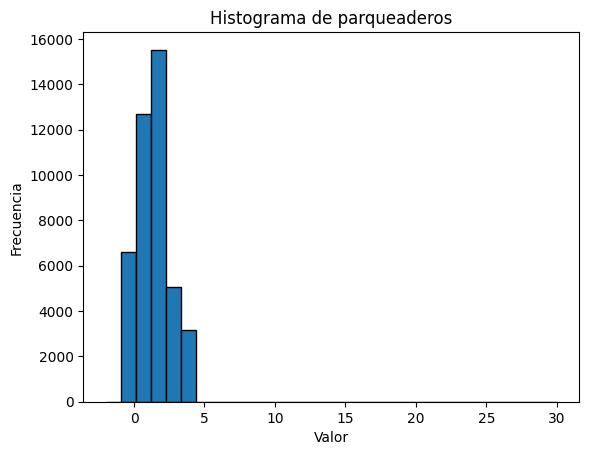

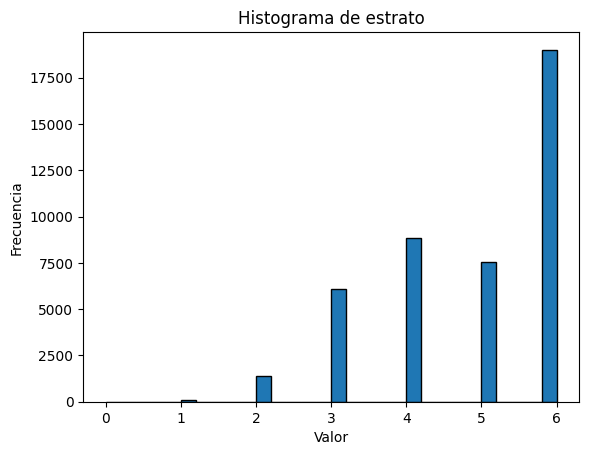

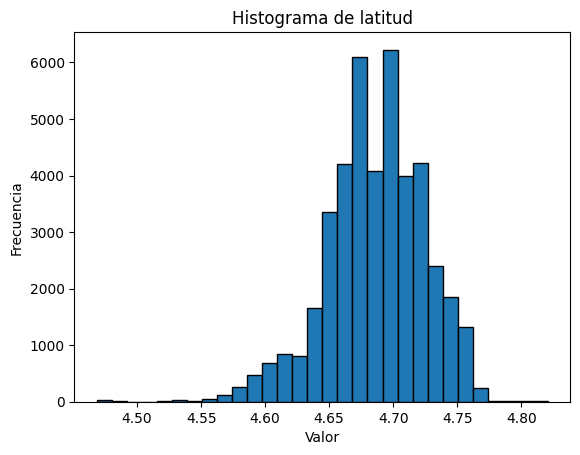

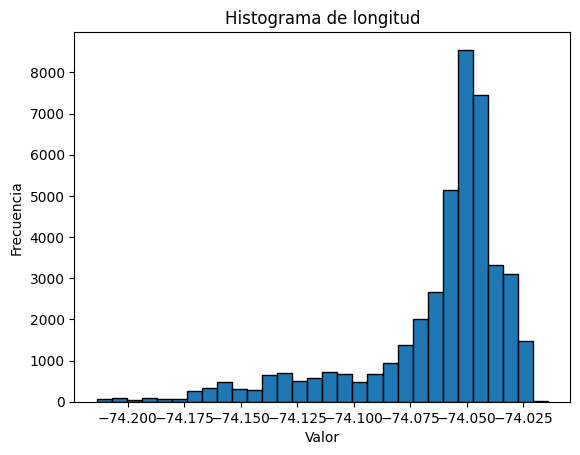

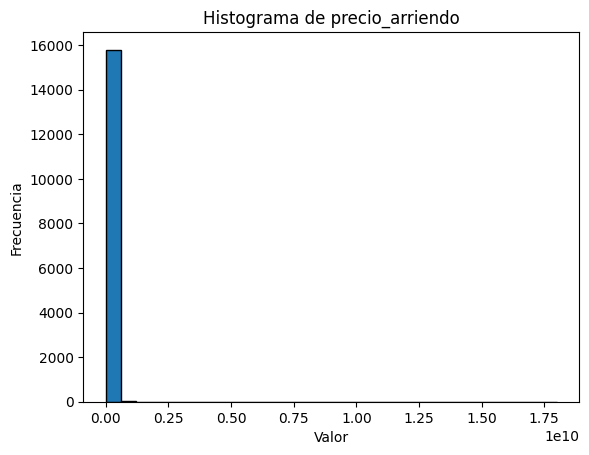

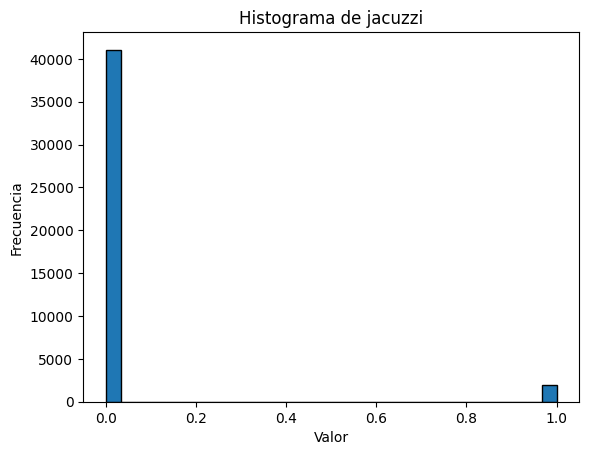

No se puede graficar 'piso' porque todos sus valores son NaN.
No se puede graficar 'closets' porque todos sus valores son NaN.


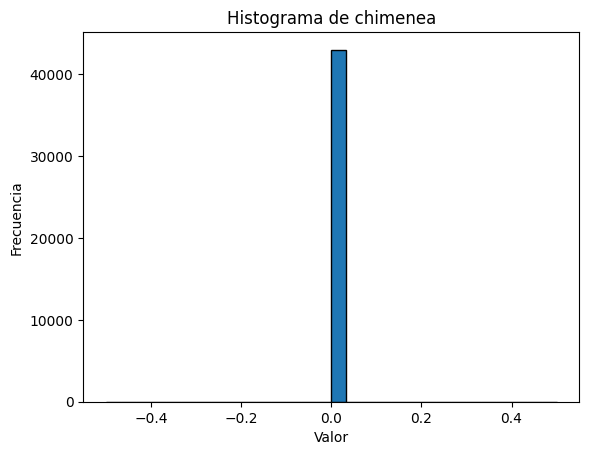

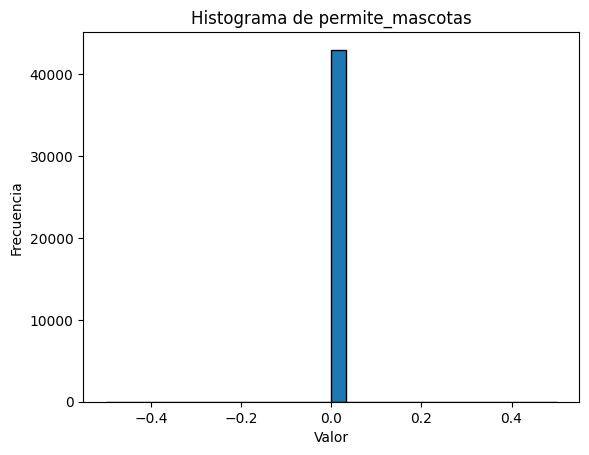

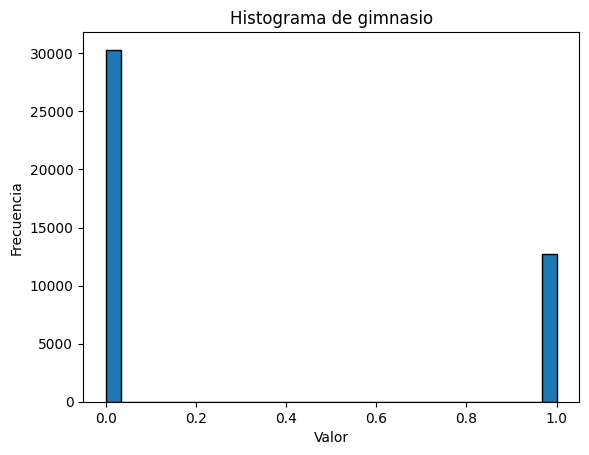

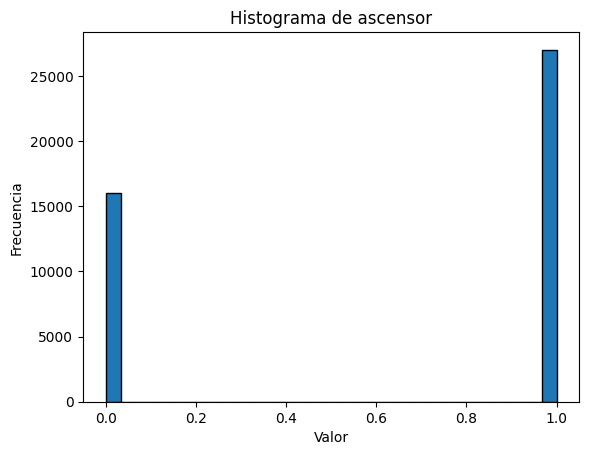

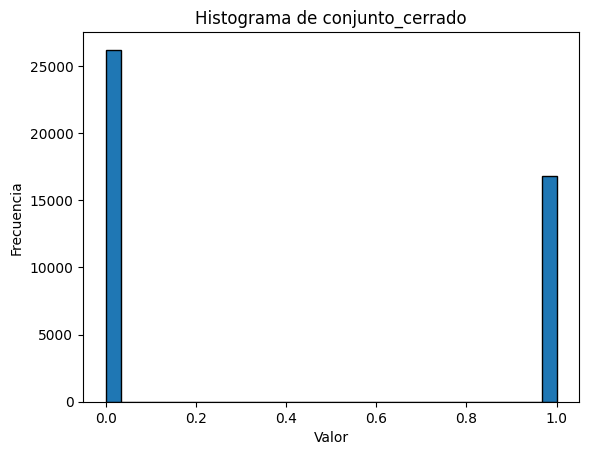

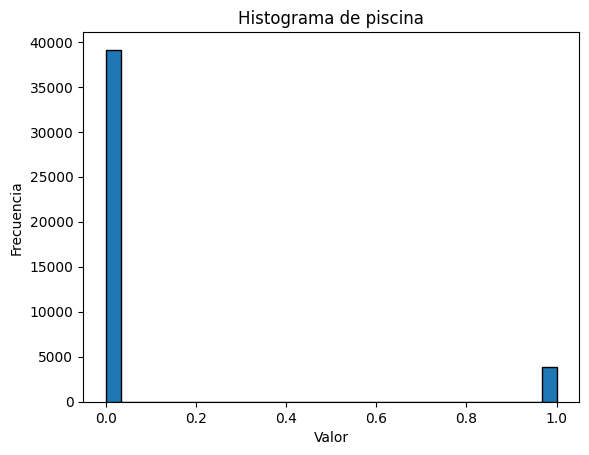

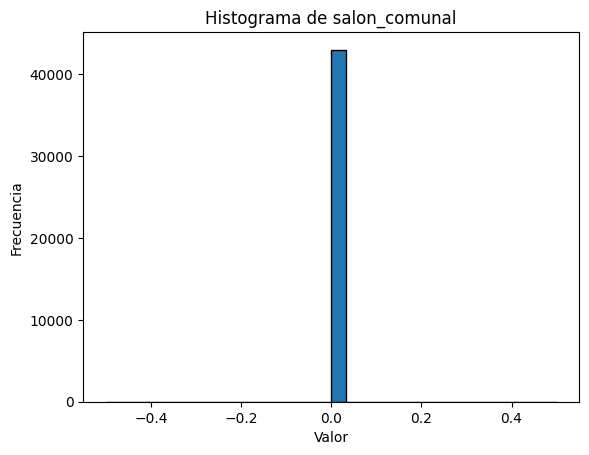

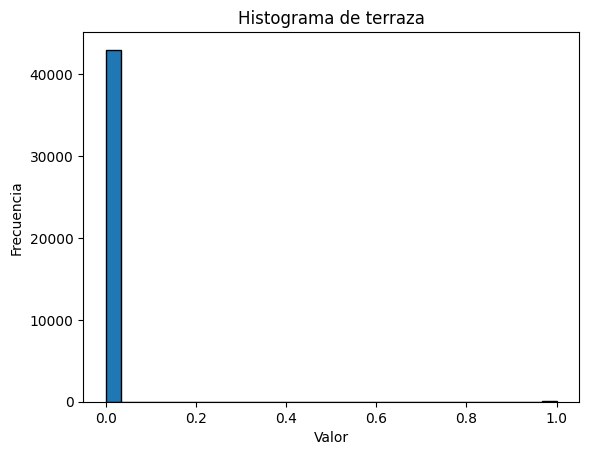

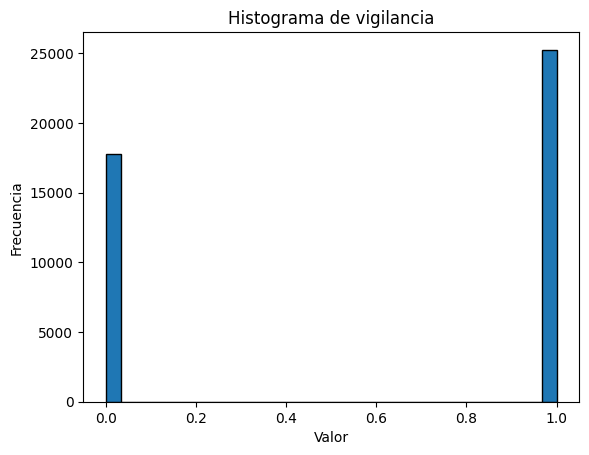

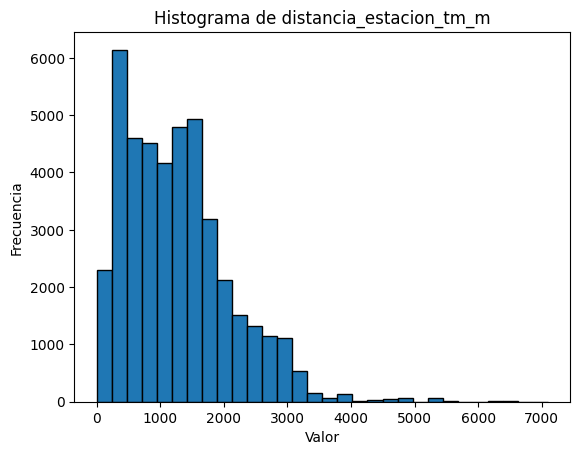

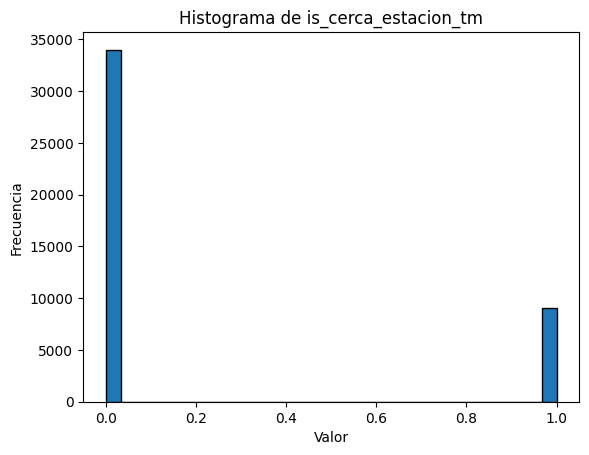

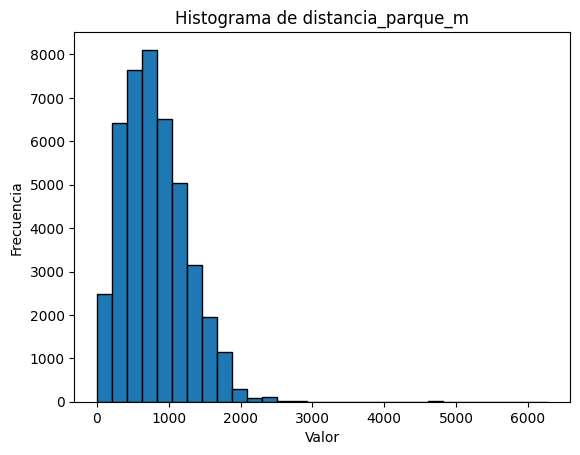

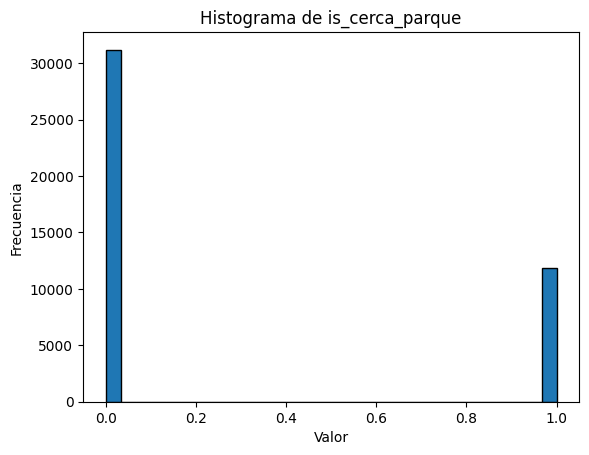

In [ ]:
num_cols = df_aptos.select_dtypes(include=['int64', 'float64']).columns

for col in num_cols:
    serie = df_aptos[col].dropna()
    if serie.empty:
        print(f"No se puede graficar '{col}' porque todos sus valores son NaN.")
        continue
    plt.hist(serie, bins=30, edgecolor='black')
    plt.xlabel('Valor')
    plt.ylabel('Frecuencia')
    plt.title(f'Histograma de {col}')
    plt.show()

Se omite '_id' porque tiene demasiadas categorías (43013).
Se omite 'codigo' porque tiene demasiadas categorías (43013).


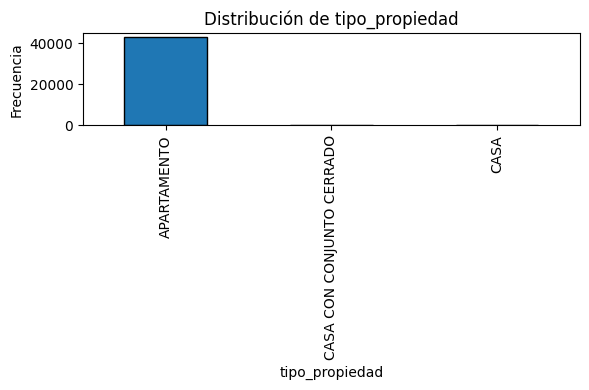

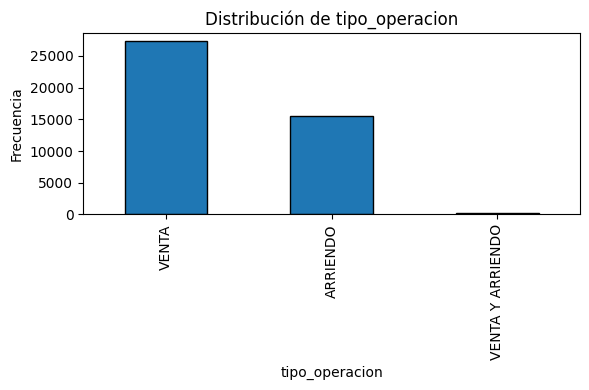

Se omite 'sector' porque tiene demasiadas categorías (104).


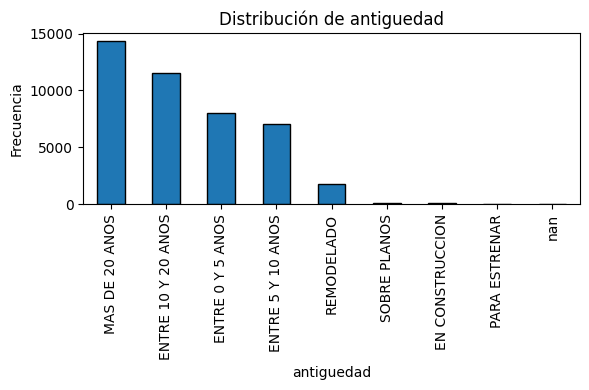

Se omite 'direccion' porque tiene demasiadas categorías (704).
Se omite 'descripcion' porque tiene demasiadas categorías (40499).


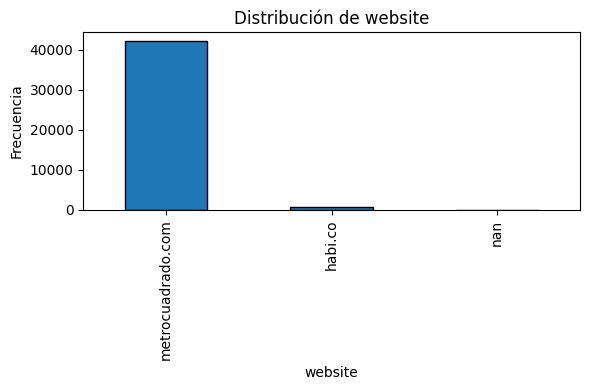

Se omite 'last_view' porque tiene demasiadas categorías (43012).
Se omite 'datetime' porque tiene demasiadas categorías (43012).
Se omite 'url' porque tiene demasiadas categorías (795).
Se omite 'timeline' porque tiene demasiadas categorías (2048).


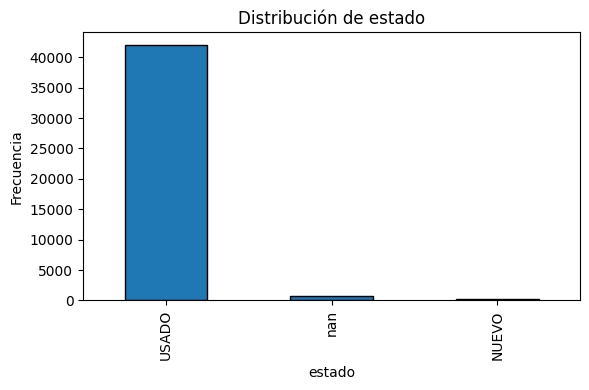

Se omite 'compañia' porque tiene demasiadas categorías (881).


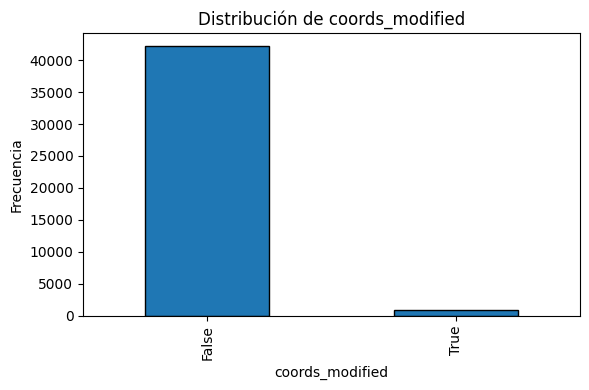

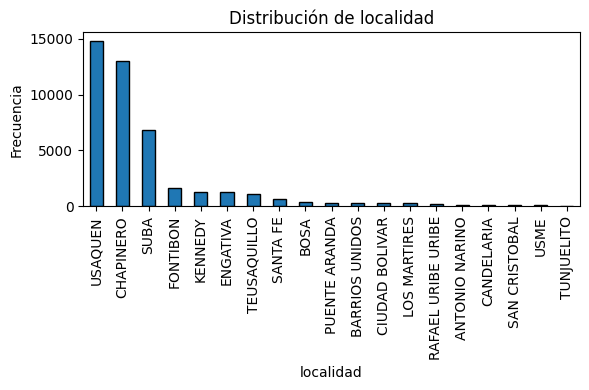

Se omite 'barrio' porque tiene demasiadas categorías (1667).
Se omite 'estacion_tm_cercana' porque tiene demasiadas categorías (146).
Se omite 'parque_cercano' porque tiene demasiadas categorías (176).


In [ ]:
cat_cols = df_aptos.select_dtypes(include=['category', 'object', 'bool']).columns

for col in cat_cols:

    conteo = df_aptos[col].value_counts(dropna=False)

    # 1) Si tiene demasiadas categorías → NO graficar
    if len(conteo) > 20:
        print(f"Se omite '{col}' porque tiene demasiadas categorías ({len(conteo)}).")
        continue

    # 2) Si está vacía → omitir
    if conteo.empty:
        print(f"Se omite '{col}' porque está vacía.")
        continue

    # 3) Graficar normalmente si es razonable
    plt.figure(figsize=(6,4))
    conteo.plot(kind='bar', edgecolor='black')
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.tight_layout()
    plt.show()

#Entendimiento inicial de las variables
El data set presenta dimensiones de 43.013 puntos de dato y 46 variables totales. Entre las que se incluyen datos de inmuebles que estan en venta, arriendo o ambos.
Respecto a las características del dataset, se encuentra que sus inmuebles están principalmente a la venta, la mayoría de ellos son apartamentos (aproximadamente ~35 mil). De estos, la mayoría son usados y presentan antiguedades mayores a los 10 años. Muy pocos de ellos son nuevos. en cuanto a la ubicación, la localidad que predomina es la de Usaquen, seguido de Chapinero y Suba.
En cuanto a variables como el precio de venta y el área, como el valor de la administración, presentan valores muy elevados como outliers, que conllevan a valores que están en el orden de potencias a la 12. Lo cuál no es muy común en ciudades como Bogotá.
La mayoria de los inmuebles presentan entre 3 habitaciones y 2 baños. Con disponibilidad de parqueaderos con número de 1 a 4. La mayoría de los apartamentos son estrato 6.
Estos inmuebles principalmente tienen ascensor, vigilancia, no se encuentran en conjunto cerrado y aproximadamente 15 casos tienen servicio de gimnasio.

#Filtro y división del dataset

Filtrar el dataset, ya que solo nos quedaremos con los datos de ventas y los casos de solo apartamentos. Nuestro nuevo dataset es df_aptos_filtrado

In [ ]:
df_aptos_filtrado = df_aptos[(df_aptos['tipo_propiedad'] == 'APARTAMENTO') & (df_aptos['tipo_operacion'] == 'VENTA')]

In [ ]:
print(f'Las dimensiones del dataframe son\n:, {df_aptos_filtrado.shape}')

Las dimensiones del dataframe son
:, (27200, 46)


De acuerdo con una revisión inicial de las variables para el modelo, se realizó una selección de las mismas, teniendo en cuenta el objetivo del modelo: cálculo de precio de ventas de apartamentos en la ciudad. Esto también se hace para optimizar recursos en procesos posteriores.

In [ ]:
cols = ['tipo_propiedad', 'tipo_operacion', 'precio_venta',
       'area', 'habitaciones', 'banos', 'administracion', 'parqueaderos',
       'estrato', 'antiguedad', 'estado', 'jacuzzi', 'piso', 'closets',
       'chimenea', 'permite_mascotas', 'gimnasio', 'ascensor',
       'conjunto_cerrado', 'piscina', 'salon_comunal', 'terraza', 'vigilancia',
       'localidad', 'distancia_estacion_tm_m', 'is_cerca_estacion_tm',
       'distancia_parque_m', 'is_cerca_parque']

df_aptos_filtrado = df_aptos_filtrado[cols]

In [ ]:
print(f'Las dimensiones del dataframe son\n:, {df_aptos_filtrado.shape}')

Las dimensiones del dataframe son
:, (27200, 28)


Al final nos quedamos con 28 variables para evaluar su utilidad en el modelo

In [ ]:
from sklearn.model_selection import train_test_split

df_train, df_temp = train_test_split(
    df_aptos_filtrado,
    test_size=0.30,
    random_state=42,
    shuffle=True
)

df_test, df_val = train_test_split(
    df_temp,
    test_size=1/3,
    random_state=42,
    shuffle=True
)

print("Tamaños finales:")
print("Train:", df_train.shape)
print("Test:", df_test.shape)
print("Validation:", df_val.shape)

Tamaños finales:
Train: (19040, 28)
Test: (5440, 28)
Validation: (2720, 28)


#Limpieza solo para dataset train df_train

In [ ]:
#análisis de datos pérdidos en el dataset
pd.set_option('display.max_rows', None)
df_train.isnull().sum()

tipo_propiedad                 0
tipo_operacion                 0
precio_venta                   0
area                           0
habitaciones                   0
banos                          0
administracion              1654
parqueaderos                   0
estrato                        1
antiguedad                     6
estado                       507
jacuzzi                        2
piso                       19040
closets                    19040
chimenea                       2
permite_mascotas               2
gimnasio                       2
ascensor                       2
conjunto_cerrado               2
piscina                        2
salon_comunal                  2
terraza                        2
vigilancia                     2
localidad                      0
distancia_estacion_tm_m        0
is_cerca_estacion_tm           0
distancia_parque_m             0
is_cerca_parque                0
dtype: int64

In [ ]:
pd.set_option('display.max_columns', None)
df_train.head(5)

tipo_propiedad tipo_operacion  precio_venta    area  habitaciones  \
22115    APARTAMENTO          VENTA  2.280000e+08   53.00           3.0   
39137    APARTAMENTO          VENTA  4.550000e+08   54.64           2.0   
31411    APARTAMENTO          VENTA  2.050000e+08   45.69           3.0   
26525    APARTAMENTO          VENTA  1.300000e+09  155.00           2.0   
41361    APARTAMENTO          VENTA  2.350000e+09  259.54           3.0   

       banos  administracion  parqueaderos  estrato          antiguedad  \
22115    2.0        267000.0           1.0      3.0   ENTRE 5 Y 10 ANOS   
39137    2.0        753000.0           2.0      5.0      MAS DE 20 ANOS   
31411    1.0        146000.0           0.0      3.0   ENTRE 5 Y 10 ANOS   
26525    2.0       1290000.0           2.0      6.0   ENTRE 5 Y 10 ANOS   
41361    4.0       2012000.0           4.0      6.0  ENTRE 10 Y 20 ANOS   

      estado  jacuzzi  piso  closets  chimenea  permite_mascotas  gimnasio  \
22115  USADO      0.0   NaN      NaN       0.0               0.0       0.0   
39137  USADO      0.0   NaN      NaN       0.0               0.0       0.0   
31411  USADO      0.0   NaN      NaN       0.0               0.0       0.0   
26525  USADO      0.0   NaN      NaN       0.0               0.0       1.0   
41361  USADO      1.0   NaN      NaN       0.0               0.0       1.0   

       ascensor  conjunto_cerrado  piscina  salon_comunal  terraza  \
22115       0.0               0.0      0.0            0.0      0.0   
39137       1.0               0.0      0.0            0.0      0.0   
31411       1.0               1.0      0.0            0.0      0.0   
26525       1.0               1.0      0.0            0.0      0.0   
41361       1.0               0.0      0.0            0.0      0.0   

       vigilancia       localidad  distancia_estacion_tm_m  \
22115         0.0            SUBA                   680.51   
39137         1.0         USAQUEN                  1341.94   
31411         1.0  CIUDAD BOLIVAR                   600.79   
26525         1.0       CHAPINERO                  1342.45   
41361         1.0       CHAPINERO                  1488.81   

       is_cerca_estacion_tm  distancia_parque_m  is_cerca_parque  
22115                     0              449.01                1  
39137                     0             1805.54                0  
31411                     0              504.88                0  
26525                     0              495.70                1  
41361                     0              691.85                0

Dado que las variables piso y closets están sin valores, decidimos eliminarlas del análisis, porque no hay forma de imputar, al final nos quedamos con 26 variables

In [ ]:
df_train = df_train.drop(columns=['piso', "closets"])

In [ ]:
df_train.shape

(19040, 26)

In [ ]:
df_train.columns


Index(['tipo_propiedad', 'tipo_operacion', 'precio_venta', 'area',
       'habitaciones', 'banos', 'administracion', 'parqueaderos', 'estrato',
       'antiguedad', 'estado', 'jacuzzi', 'chimenea', 'permite_mascotas',
       'gimnasio', 'ascensor', 'conjunto_cerrado', 'piscina', 'salon_comunal',
       'terraza', 'vigilancia', 'localidad', 'distancia_estacion_tm_m',
       'is_cerca_estacion_tm', 'distancia_parque_m', 'is_cerca_parque'],
      dtype='object')

In [ ]:
df_train['estrato'].value_counts(dropna=False)

estrato
6.0    8255
4.0    4020
5.0    3683
3.0    2358
2.0     655
1.0      63
0.0       5
NaN       1
Name: count, dtype: int64

Se imputo el único valor pérdido y los valores con estrato 0 con la moda, dado que la variable es cualitativa ordinal

In [ ]:
moda = df_train['estrato'].mode()[0]
print(moda)
df_train['estrato'].fillna(moda, inplace=True)
df_train['estrato'] = df_train['estrato'].replace(0.00, moda)

6.0


/tmp/ipython-input-28647694.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['estrato'].fillna(moda, inplace=True)


Se hace imputación para la variable baños, donde hay casos con cero baños, lo cual no resulta tan verídico. En teoría, al menos deberia haber un baño. Se imputa con la moda.

In [ ]:
df_train['banos'].value_counts()

banos
2.0    6571
3.0    5120
4.0    3281
5.0    2041
1.0    2020
0.0       6
6.0       1
Name: count, dtype: int64

In [ ]:
moda_banos=df_train['banos'].mode()[0]
print(moda_banos)
df_train['banos'] = df_train['banos'].replace(0.00, moda_banos)

2.0


Se visualizan las variables chimenea, permite_mascotas y salón comunal. Se observa que solo tiene valores de 0 y nan, por lo que no podrían ser relevantes para el modelo, entonces se eliminan

In [ ]:
df_train['salon_comunal'].describe()

count    19038.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: salon_comunal, dtype: float64

In [ ]:
df_train = df_train.drop(columns=['chimenea', "permite_mascotas", 'salon_comunal'])

Se observa la variable administración y se observan valores atípicos, donde incluso el valor máximo asciende hasta los 3.366.000.000, por lo que no nos resultó coherente y en averiguaciones el mayor valor de admon en Bogotá asciende a los 6 millones de pesos. De manera, que los valores en nuestro caso mayor a 6 millones se eliminaron del dataset

In [ ]:
pd.set_option('display.float_format', '{:.2f}'.format)
df_train['administracion'].describe()

count        17386.00
mean       5102346.52
std       75196555.34
min              1.00
25%         350000.00
50%         650000.00
75%        1186500.00
max     3366000000.00
Name: administracion, dtype: float64

In [ ]:
umbral = 6000000
medianas_por_estrato = df_train[df_train['administracion'] <= umbral].groupby('estrato')['administracion'].median()
medianas_por_estrato

estrato
1.00     84000.00
2.00     90000.00
3.00    175000.00
4.00    373000.00
5.00    633000.00
6.00   1200000.00
Name: administracion, dtype: float64

In [ ]:
def imputar_admin(row):
    valor = row['administracion']
    estrato = row['estrato']

    if pd.isna(valor) or valor > umbral:
        return medianas_por_estrato.loc[estrato]
    else:
        return valor

df_train['administracion'] = df_train.apply(imputar_admin, axis=1)

In [ ]:
df_train['administracion'].describe()

count     19040.00
mean     837235.89
std      693785.53
min           1.00
25%      350000.00
50%      633000.00
75%     1200000.00
max     6000000.00
Name: administracion, dtype: float64

In [ ]:
df_train['parqueaderos'].describe()

count   19040.00
mean        1.75
std         1.09
min        -2.00
25%         1.00
50%         2.00
75%         2.00
max        30.00
Name: parqueaderos, dtype: float64

In [ ]:
#cambiar valores raros en variable parqueadero (-2)
df_train['parqueaderos'] = df_train['parqueaderos'].where(df_train['parqueaderos'] >= 0, df_train['parqueaderos'].abs())

In [ ]:
df_train['estado'].value_counts(dropna=False)

estado
USADO    18376
NaN        507
NUEVO      157
Name: count, dtype: int64

In [ ]:
df_train.loc[
    df_train['estado'].isna(),
    ['estado', 'antiguedad']
].head()

estado          antiguedad
416    NaN  ENTRE 10 Y 20 ANOS
439    NaN      MAS DE 20 ANOS
447    NaN  ENTRE 10 Y 20 ANOS
200    NaN      MAS DE 20 ANOS
326    NaN    ENTRE 0 Y 5 ANOS

In [ ]:
df_train['antiguedad'].value_counts(dropna=False)

antiguedad
MAS DE 20 ANOS        6816
ENTRE 10 Y 20 ANOS    5178
ENTRE 0 Y 5 ANOS      3163
ENTRE 5 Y 10 ANOS     3065
REMODELADO             655
SOBRE PLANOS            79
EN CONSTRUCCION         65
PARA ESTRENAR           13
NaN                      6
Name: count, dtype: int64

Se imputó la variable estado a partir de la variable antigüedad

In [ ]:
df_train.loc[
    df_train['estado'].isna() &
    (
        (df_train['antiguedad'] != 'PARA ESTRENAR') &
        (df_train['antiguedad'] != 'SOBRE PLANOS') &
        (df_train['antiguedad'] != 'EN CONSTRUCCION')
    ),
    'estado'
] = 'USADO'

In [ ]:
df_train['estado'].value_counts(dropna=False)

estado
USADO    18883
NUEVO      157
Name: count, dtype: int64

In [ ]:
#Rellenar los NaN con una nueva categoría
df_train['antiguedad'].fillna('DESCONOCIDO', inplace=True)

/tmp/ipython-input-1817552050.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['antiguedad'].fillna('DESCONOCIDO', inplace=True)


In [ ]:
cols = ['jacuzzi', 'gimnasio', 'ascensor', 'conjunto_cerrado',
        'piscina', 'terraza', 'vigilancia']

for col in cols:
    moda = df_train[col].mode()[0]
    df_train[col] = df_train[col].fillna(moda)

In [ ]:
df_train.isnull().sum()

tipo_propiedad             0
tipo_operacion             0
precio_venta               0
area                       0
habitaciones               0
banos                      0
administracion             0
parqueaderos               0
estrato                    0
antiguedad                 0
estado                     0
jacuzzi                    0
gimnasio                   0
ascensor                   0
conjunto_cerrado           0
piscina                    0
terraza                    0
vigilancia                 0
localidad                  0
distancia_estacion_tm_m    0
is_cerca_estacion_tm       0
distancia_parque_m         0
is_cerca_parque            0
dtype: int64

Observando la variable venta, esto presenta outliers muy grandes, de acuerdo con lo indagado, en Bogotá el mayor valor de un apartamento no supera los 5 mil millones de pesos y su precio mínimo puede estar entre los 100 y 130 millones de pesos

In [ ]:
df_train['precio_venta'].describe()

count           19040.00
mean       1990704483.43
std       44180859054.92
min           1000000.00
25%         410000000.00
50%         700000000.00
75%        1300000000.00
max     3240000000000.00
Name: precio_venta, dtype: float64

Explorando gráficamente la variable precio venta, se observa que hay un gran número de outliers con precios demasiado altos y algunos muy bajos

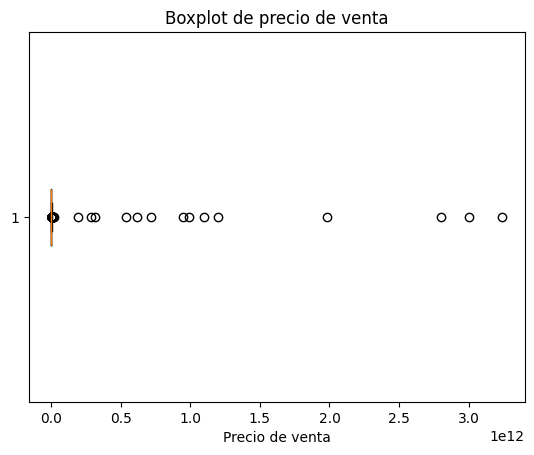

In [ ]:
#boxplot precio venta
plt.boxplot(df_train['precio_venta'], vert=False)
plt.xlabel('Precio de venta')
plt.title('Boxplot de precio de venta')
plt.show()

Se imputó el precio de venta eliminando los valores que estan entre 80 a 5 mil millones de pesos ya que esto presenta coherencia con lo registrado para la ciudad de bogotá

In [ ]:
(df_train['precio_venta'] < 100000000).sum()

np.int64(43)

In [ ]:
(df_train['precio_venta'] > 5000000000).sum()

np.int64(208)

In [ ]:
#A pesar que la variable precio_venta se podría imputar de varias maneras, usando diversas variables en este caso haremos uso de la variable estrato, tomando la mediana
#de precio_venta por cada uno de ellos e imputando los datos, ya que podrían ser errores de digitación

umbral_down = 100000000
umbral_up = 5000000000
medianas_por_estrato_p = df_train[(df_train['precio_venta'] > umbral_down) & (df_train['precio_venta'] < umbral_up)].groupby('estrato')['precio_venta'].median()
medianas_por_estrato_p

estrato
1.00    162000000.00
2.00    160000000.00
3.00    255000000.00
4.00    452650000.00
5.00    700000000.00
6.00   1300000000.00
Name: precio_venta, dtype: float64

In [ ]:
def imputar_admin_p(row):
    valor_p = row['precio_venta']
    estrato_p = row['estrato']

    if valor_p < umbral_down or valor_p > umbral_up:
        return medianas_por_estrato_p.loc[estrato_p]
    else:
        return valor_p

df_train['precio_venta'] = df_train.apply(imputar_admin_p, axis=1)

In [ ]:
df_train['precio_venta'].describe()

count        19040.00
mean     994730502.99
std      856479116.69
min      100000000.00
25%      410000000.00
50%      700000000.00
75%     1300000000.00
max     5000000000.00
Name: precio_venta, dtype: float64

Ahora, se revisa la variable área, esta también presenta valores demasiado atípicos, con áreas de hasta 9.999 m2, esto en bogotá resulta extraño. De acuerdo con lo revisado un punto de corte podría ser 1000 m2 y con aptos desde los 20m2, ya que se presentan valores mínimos de 0.

In [ ]:
#area
df_train['area'].describe()

count   19040.00
mean      141.05
std       184.45
min         0.00
25%        69.00
50%       110.00
75%       179.49
max      9999.00
Name: area, dtype: float64

In [ ]:
(df_train['area']<20).sum()

np.int64(51)

In [ ]:
(df_train['area']>1000).sum()

np.int64(14)

In [ ]:
umbral_down_a = 20
umbral_up_a = 1000
medianas_por_estrato_a = df_train[(df_train['area'] > umbral_down_a) & (df_train['area'] < umbral_up_a)].groupby('estrato')['area'].median()
medianas_por_estrato_a

estrato
1.00    49.00
2.00    47.00
3.00    56.00
4.00    79.34
5.00   114.42
6.00   178.00
Name: area, dtype: float64

In [ ]:
def imputar_admin_a(row):
    valor_a = row['area']
    estrato_a = row['estrato']

    if valor_a < umbral_down_a or valor_a > umbral_up_a:
        return medianas_por_estrato_a.loc[estrato_a]
    else:
        return valor_a

df_train['area'] = df_train.apply(imputar_admin_a, axis=1)

In [ ]:
df_train['area'].describe()

count   19040.00
mean      137.61
std        93.45
min        20.00
25%        69.00
50%       110.00
75%       179.00
max       750.00
Name: area, dtype: float64

#Imputación del df_test

In [ ]:
df_test = df_test[['tipo_propiedad', 'tipo_operacion', 'precio_venta', 'area',
       'habitaciones', 'banos', 'administracion', 'parqueaderos', 'estrato',
       'antiguedad', 'estado', 'jacuzzi', 'gimnasio', 'ascensor',
       'conjunto_cerrado', 'piscina', 'terraza', 'vigilancia', 'localidad',
       'distancia_estacion_tm_m', 'is_cerca_estacion_tm', 'distancia_parque_m',
       'is_cerca_parque']]

In [ ]:
df_test.shape

(5440, 23)

In [ ]:
#análisis de datos pérdidos en el dataset de test
pd.set_option('display.max_rows', None)
df_test.isnull().sum()

tipo_propiedad               0
tipo_operacion               0
precio_venta                 0
area                         0
habitaciones                 0
banos                        0
administracion             483
parqueaderos                 0
estrato                      0
antiguedad                   0
estado                     140
jacuzzi                      0
gimnasio                     0
ascensor                     0
conjunto_cerrado             0
piscina                      0
terraza                      0
vigilancia                   0
localidad                    0
distancia_estacion_tm_m      0
is_cerca_estacion_tm         0
distancia_parque_m           0
is_cerca_parque              0
dtype: int64

In [ ]:
def imputar_admin_p(row):
    valor_p = row['precio_venta']
    estrato_p = row['estrato']

    if valor_p < umbral_down or valor_p > umbral_up:
        return medianas_por_estrato_p.loc[estrato_p]
    else:
        return valor_p

df_test['precio_venta'] = df_test.apply(imputar_admin_p, axis=1)

In [ ]:
df_test['precio_venta'].describe()

count         5440.00
mean     998893286.86
std      854026345.68
min      105000000.00
25%      419187500.00
50%      720000000.00
75%     1300000000.00
max     5000000000.00
Name: precio_venta, dtype: float64

In [ ]:
def imputar_admin_a(row):
    valor_a = row['area']
    estrato_a = row['estrato']

    if valor_a < umbral_down_a or valor_a > umbral_up_a:
        return medianas_por_estrato_a.loc[estrato_a]
    else:
        return valor_a

df_test['area'] = df_test.apply(imputar_admin_a, axis=1)

In [ ]:
df_test['banos'] = df_test['banos'].replace(0.00, moda_banos)

In [ ]:
def imputar_admin(row):
    valor = row['administracion']
    estrato = row['estrato']

    if pd.isna(valor) or valor > umbral:
        return medianas_por_estrato.loc[estrato]
    else:
        return valor

df_test['administracion'] = df_test.apply(imputar_admin, axis=1)

In [ ]:
df_test['parqueaderos'] = df_test['parqueaderos'].where(df_test['parqueaderos'] >= 0, df_test['parqueaderos'].abs())

In [ ]:
moda_estrato = df_train['estrato'].mode()[0]
print(moda_estrato)
df_test['estrato'].fillna(moda_estrato, inplace=True)
df_test['estrato'] = df_test['estrato'].replace(0.00, moda_estrato)

6.0


/tmp/ipython-input-1919206946.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['estrato'].fillna(moda_estrato, inplace=True)


In [ ]:
df_test.loc[
    df_test['estado'].isna() &
    (
        (df_test['antiguedad'] != 'PARA ESTRENAR') &
        (df_test['antiguedad'] != 'SOBRE PLANOS') &
        (df_test['antiguedad'] != 'EN CONSTRUCCION')
    ),
    'estado'
] = 'USADO'

In [ ]:
cols = ['jacuzzi', 'gimnasio', 'ascensor', 'conjunto_cerrado',
        'piscina', 'terraza', 'vigilancia']

for col in cols:
    moda_jga = df_train[col].mode()[0]
    df_test[col] = df_test[col].fillna(moda_jga)

In [ ]:
df_test['antiguedad'].fillna('DESCONOCIDO', inplace=True)

/tmp/ipython-input-2799126734.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['antiguedad'].fillna('DESCONOCIDO', inplace=True)


#Selección columnas df_val

In [ ]:
df_val = df_val[['tipo_propiedad', 'tipo_operacion', 'precio_venta', 'area',
       'habitaciones', 'banos', 'administracion', 'parqueaderos', 'estrato',
       'antiguedad', 'estado', 'jacuzzi', 'gimnasio', 'ascensor',
       'conjunto_cerrado', 'piscina', 'terraza', 'vigilancia', 'localidad',
       'distancia_estacion_tm_m', 'is_cerca_estacion_tm', 'distancia_parque_m',
       'is_cerca_parque']]

In [ ]:
df_val.shape

(2720, 23)

In [ ]:
#análisis de datos pérdidos en el dataset de validación
pd.set_option('display.max_rows', None)
df_val.isnull().sum()

tipo_propiedad               0
tipo_operacion               0
precio_venta                 0
area                         0
habitaciones                 0
banos                        0
administracion             253
parqueaderos                 0
estrato                      0
antiguedad                   3
estado                      79
jacuzzi                      0
gimnasio                     0
ascensor                     0
conjunto_cerrado             0
piscina                      0
terraza                      0
vigilancia                   0
localidad                    0
distancia_estacion_tm_m      0
is_cerca_estacion_tm         0
distancia_parque_m           0
is_cerca_parque              0
dtype: int64

In [ ]:
def imputar_admin_p(row):
    valor_p = row['precio_venta']
    estrato_p = row['estrato']

    if valor_p < umbral_down or valor_p > umbral_up:
        return medianas_por_estrato_p.loc[estrato_p]
    else:
        return valor_p

df_val['precio_venta'] = df_val.apply(imputar_admin_p, axis=1)

In [ ]:
df_val['precio_venta'].describe()

count         2720.00
mean    1000072624.84
std      896120483.37
min      109500000.00
25%      384750000.00
50%      690000000.00
75%     1300000000.00
max     5000000000.00
Name: precio_venta, dtype: float64

In [ ]:
def imputar_admin_a(row):
    valor_a = row['area']
    estrato_a = row['estrato']

    if valor_a < umbral_down_a or valor_a > umbral_up_a:
        return medianas_por_estrato_a.loc[estrato_a]
    else:
        return valor_a

df_val['area'] = df_val.apply(imputar_admin_a, axis=1)

In [ ]:
df_val['banos'] = df_val['banos'].replace(0.00, moda_banos)

In [ ]:
def imputar_admin(row):
    valor = row['administracion']
    estrato = row['estrato']

    if pd.isna(valor) or valor > umbral:
        return medianas_por_estrato.loc[estrato]
    else:
        return valor

df_val['administracion'] = df_val.apply(imputar_admin, axis=1)

In [ ]:
df_val['parqueaderos'] = df_val['parqueaderos'].where(df_val['parqueaderos'] >= 0, df_val['parqueaderos'].abs())

In [ ]:
moda_estrato = df_train['estrato'].mode()[0]
print(moda_estrato)
df_val['estrato'].fillna(moda_estrato, inplace=True)
df_val['estrato'] = df_val['estrato'].replace(0.00, moda_estrato)

6.0


/tmp/ipython-input-2559782004.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_val['estrato'].fillna(moda_estrato, inplace=True)


In [ ]:
df_val.loc[
    df_val['estado'].isna() &
    (
        (df_val['antiguedad'] != 'PARA ESTRENAR') &
        (df_val['antiguedad'] != 'SOBRE PLANOS') &
        (df_val['antiguedad'] != 'EN CONSTRUCCION')
    ),
    'estado'
] = 'USADO'

In [ ]:
cols = ['jacuzzi', 'gimnasio', 'ascensor', 'conjunto_cerrado',
        'piscina', 'terraza', 'vigilancia']

for col in cols:
    moda_jga = df_train[col].mode()[0]
    df_val[col] = df_val[col].fillna(moda_jga)

In [ ]:
df_val['antiguedad'].fillna('DESCONOCIDO', inplace=True)

/tmp/ipython-input-3271997462.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_val['antiguedad'].fillna('DESCONOCIDO', inplace=True)


#Categorización de las variables

In [ ]:
categoricas=['estrato', 'antiguedad', 'estado', 'jacuzzi', 'gimnasio', 'ascensor', 'conjunto_cerrado', 'piscina',
             'terraza', 'vigilancia', 'localidad', 'is_cerca_estacion_tm', 'is_cerca_parque']
cuantitativas =['precio_venta', 'area', 'habitaciones', 'banos', 'administracion', 'distancia_estacion_tm_m',
                 'distancia_parque_m']

In [ ]:
#df_train
df_train[categoricas] = df_train[categoricas].astype('category')
df_train[cuantitativas] = df_train[cuantitativas].astype(float)

#df_test
df_test[categoricas] = df_test[categoricas].astype('category')
df_test[cuantitativas] = df_test[cuantitativas].astype(float)

#df_val
df_val[categoricas] = df_val[categoricas].astype('category')
df_val[cuantitativas] = df_val[cuantitativas].astype(float)


#Se realizan histogramas para las variables cuantitativas limpias solo con las de entrenamiento

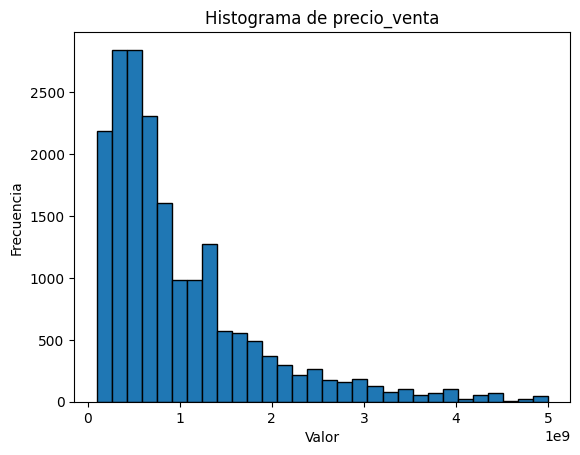

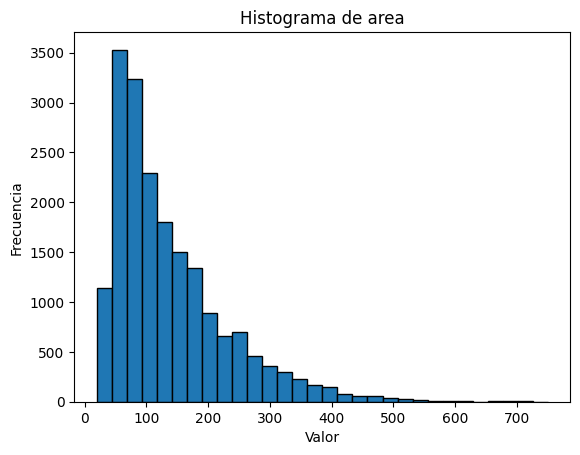

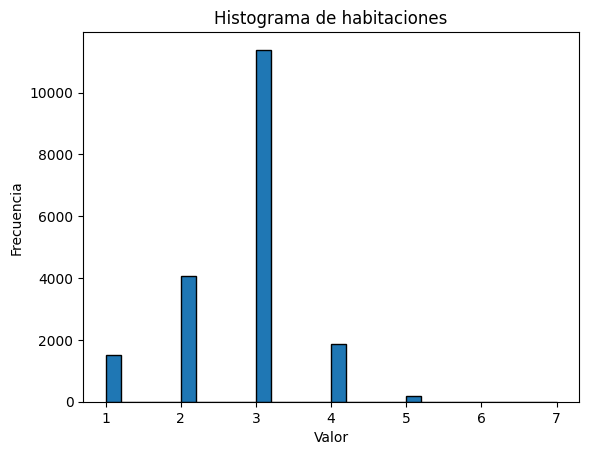

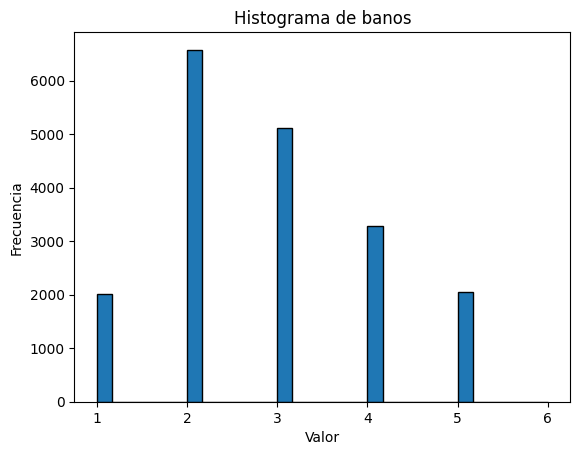

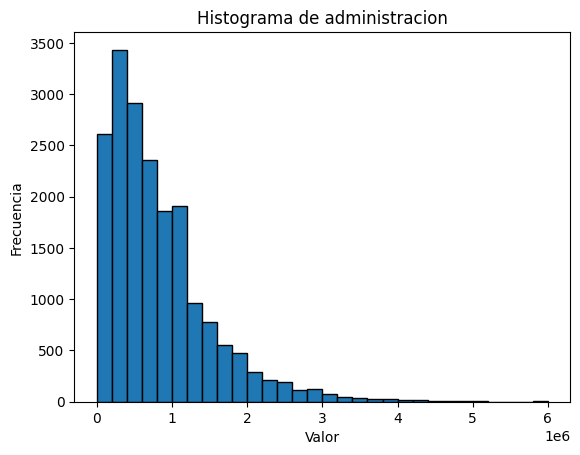

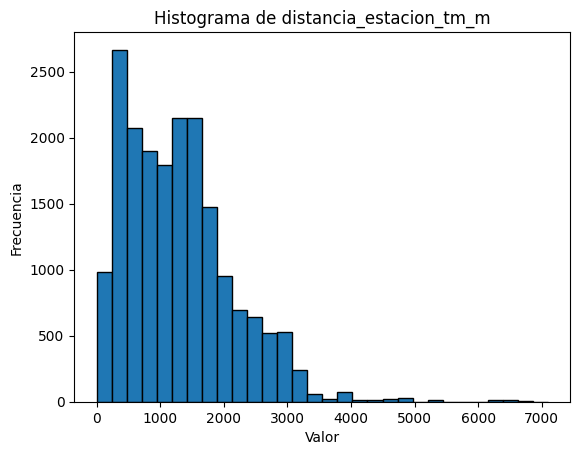

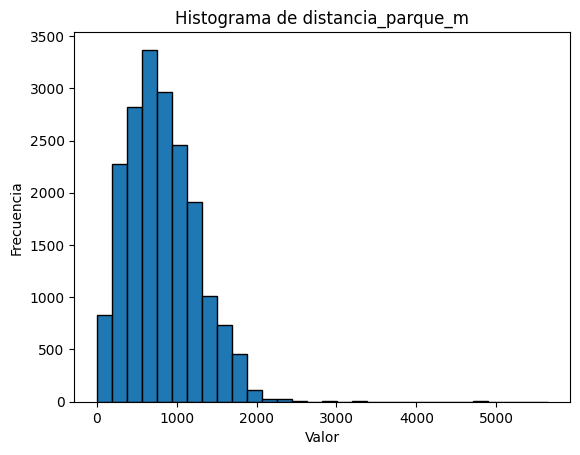

In [ ]:
for i in cuantitativas:
  plt.hist(df_train[i], bins=30, edgecolor='black')
  plt.xlabel('Valor')
  plt.ylabel('Frecuencia')
  plt.title(f'Histograma de {i}')
  plt.show()


#Categóricas-Gráficos de frecuencia

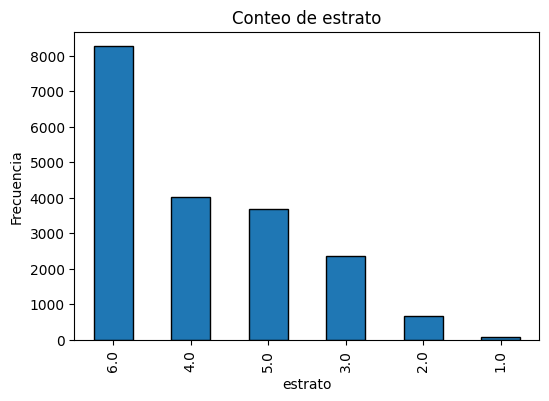

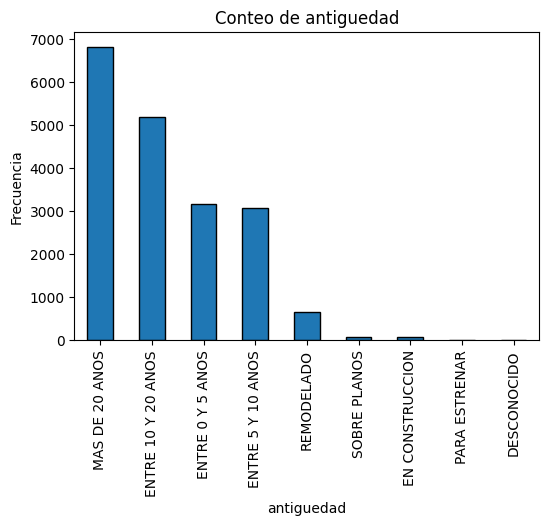

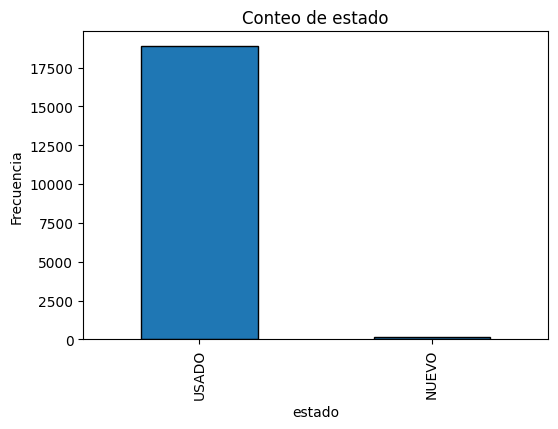

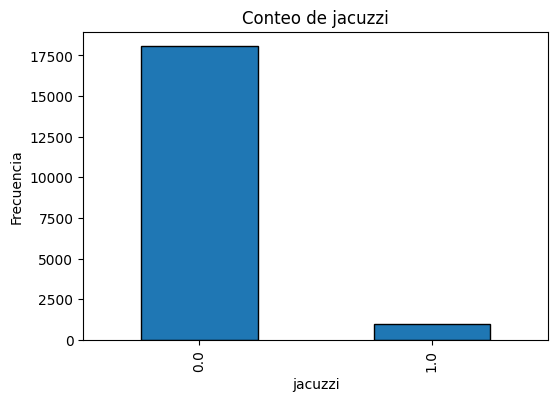

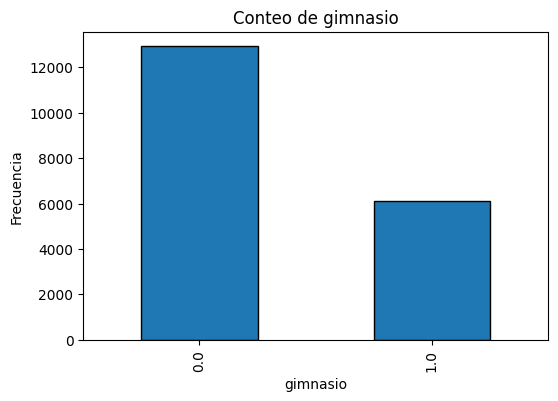

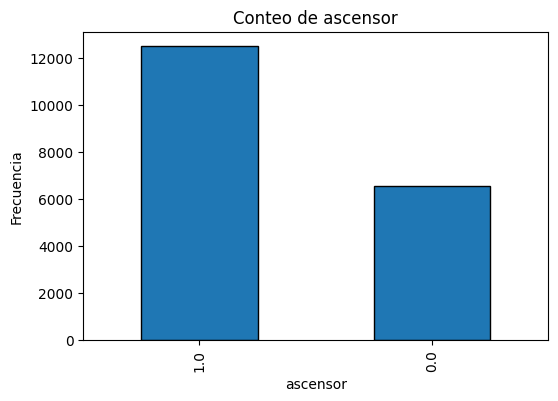

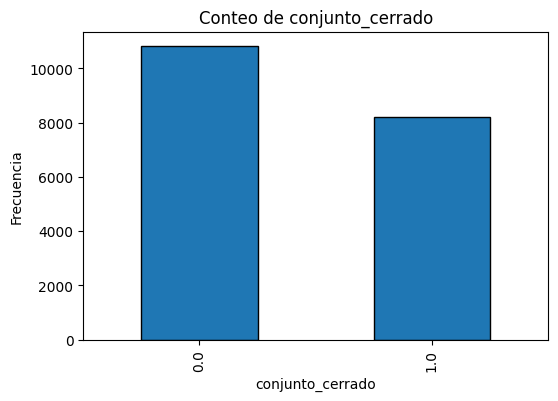

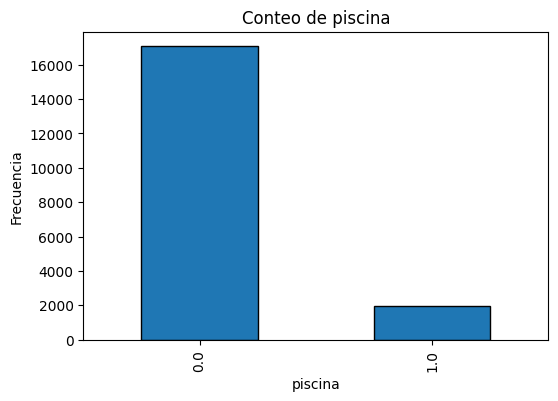

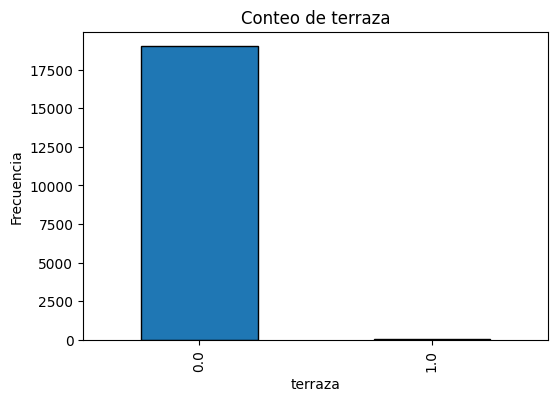

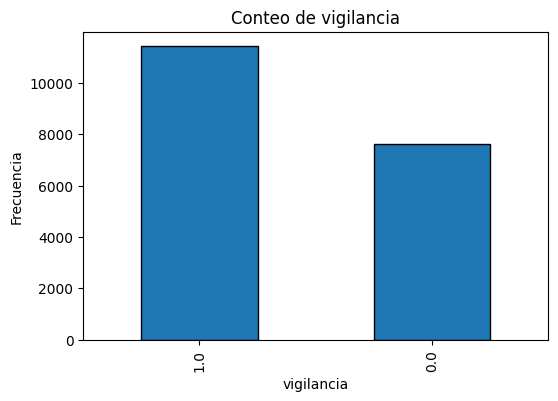

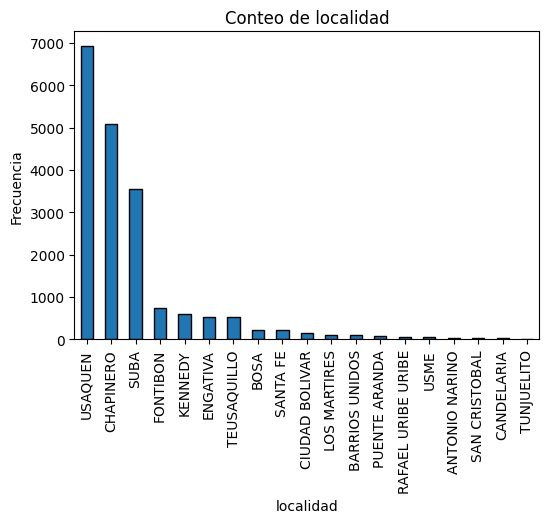

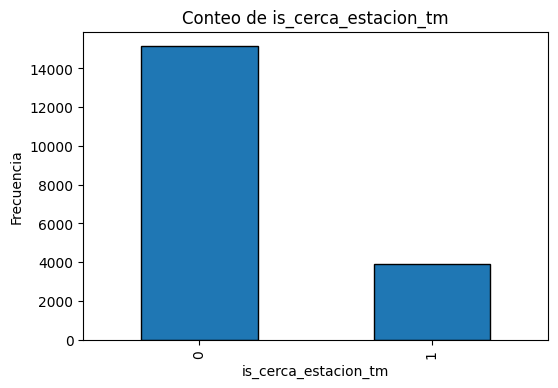

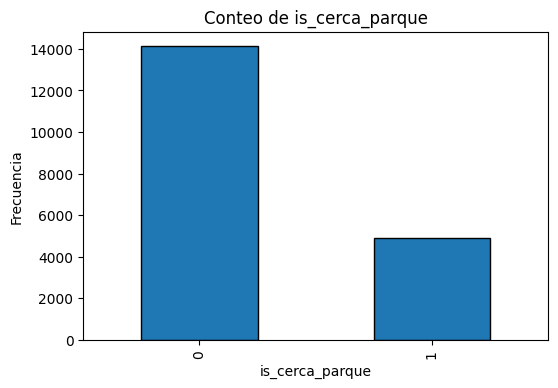

In [ ]:
for col in categoricas:
    plt.figure(figsize=(6,4))
    df_train[col].value_counts().plot(kind='bar', edgecolor='black')
    plt.title(f'Conteo de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()

#Entendimiento de variables limpias
De acuerdo con las variables categóricas, en la base de datos predominan apartamentos de estrato 6, con antiguedad de más de 20 años y principalmente usados. La mayoría de estos apartamentos no tienen jacuzzi, gimnasio, ascensor, no están en un conjunto cerrado, tampoco tienen piscina ni terraza. La mayoría de estos apartamentos no tienen un parque ni una estación de transporte masivo a menos de 500m. La mayoría de estos apartamentos se ubican en Usaquen.

#Modelo de machine learning

In [ ]:
#copia del data set (por si pasa algo)
df_aptos_ML_train = df_train.copy()
df_aptos_ML_test  = df_test.copy()
df_aptos_ML_val   = df_val.copy()

In [ ]:
df_val['precio_venta'].describe()

count         2720.00
mean    1000072624.84
std      896120483.37
min      109500000.00
25%      384750000.00
50%      690000000.00
75%     1300000000.00
max     5000000000.00
Name: precio_venta, dtype: float64

In [ ]:
#crear variables dummies de variables categoricas
df_aptos_ML_train= pd.get_dummies(df_aptos_ML_train, columns=categoricas, drop_first=True) #true cuando quiero borrarla y false cuando no
df_aptos_ML_train.head()
cols_ML = df_aptos_ML_train.columns


In [ ]:
df_aptos_ML_test = pd.get_dummies(df_aptos_ML_test, columns=categoricas, drop_first=True).reindex(columns=cols_ML, fill_value=0)
df_aptos_ML_val = pd.get_dummies(df_aptos_ML_val, columns=categoricas, drop_first=True).reindex(columns=cols_ML, fill_value=0)

#Selección de variables relevantes según tests estadísticos

Para esta sección se realizarán pruebas como la correlación y ANOVA-test

In [ ]:
# Selección automática robusta de variables-solo se hace con train
num_vars = df_aptos_ML_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
num_vars.remove('precio_venta')
cat_vars = cat_vars = [c for c in df_aptos_ML_train.columns if c.startswith(('estrato_', 'antiguedad_', 'estado_','jacuzzi_', 'gimnasio_', 'ascensor_',
                                                                       'conjunto_', 'piscina_', 'terraza_', 'vigilancia_0', 'localidad_', 'is_cerca_'))]


In [ ]:
#correlación variables númericas
correlaciones = df_aptos_ML_train[num_vars + ['precio_venta']].corr()['precio_venta'].abs().sort_values(ascending=False)
print(correlaciones)
sel_corr = correlaciones[correlaciones > 0.50].index.tolist()
sel_corr.remove('precio_venta')
print(sel_corr)

precio_venta              1.00
area                      0.83
administracion            0.79
parqueaderos              0.72
banos                     0.71
habitaciones              0.39
distancia_estacion_tm_m   0.11
distancia_parque_m        0.04
Name: precio_venta, dtype: float64
['area', 'administracion', 'parqueaderos', 'banos']


In [ ]:
#Variables categóricas
from sklearn.feature_selection import SelectKBest, f_regression
X_cat = df_aptos_ML_train[cat_vars]
y = df_aptos_ML_train['precio_venta']

selector = SelectKBest(score_func=f_regression, k='all')
selector.fit(X_cat, y)

f_scores = selector.scores_
p_values = selector.pvalues_

resultados_cat = pd.DataFrame({
    'variable': X_cat.columns,
    'F_score': f_scores,
    'p_value': p_values
}).sort_values(by='p_value')
print(resultados_cat)

alpha = 0.05
vars_cat_significativas = resultados_cat[resultados_cat['p_value'] < alpha]['variable'].tolist()
print(vars_cat_significativas)

                         variable  F_score  p_value
1                     estrato_3.0  2026.09     0.00
2                     estrato_4.0  1740.22     0.00
4                     estrato_6.0  9712.34     0.00
23            localidad_CHAPINERO  5015.74     0.00
14                    jacuzzi_1.0   904.06     0.00
15                   gimnasio_1.0   748.99     0.00
33                 localidad_SUBA   654.04     0.00
0                     estrato_2.0   631.90     0.00
27              localidad_KENNEDY   453.46     0.00
16                   ascensor_1.0   376.69     0.00
25             localidad_ENGATIVA   332.42     0.00
18                    piscina_1.0   326.54     0.00
38         is_cerca_estacion_tm_1   286.97     0.00
26             localidad_FONTIBON   254.47     0.00
21                 localidad_BOSA   227.35     0.00
3                     estrato_5.0   140.05     0.00
24       localidad_CIUDAD BOLIVAR   126.69     0.00
34          localidad_TEUSAQUILLO   113.45     0.00
32          

In [ ]:
features_finales = sel_corr + vars_cat_significativas

# TRAIN
X_train = df_aptos_ML_train[features_finales]
y_train = df_aptos_ML_train['precio_venta']

# TEST
X_test = df_aptos_ML_test[features_finales]
y_test = df_aptos_ML_test['precio_venta']

# VALIDATION
X_val = df_aptos_ML_val[features_finales]
y_val = df_aptos_ML_val['precio_venta']

In [ ]:
from sklearn.preprocessing import StandardScaler

#Crear el scaler
scaler = StandardScaler()

#Ajustar solo con el train
scaler.fit(X_train)

#Transformar los tres sets usando el mismo scaler
X_train_scaled = scaler.transform(X_train)
X_test_scaled  = scaler.transform(X_test)
X_val_scaled   = scaler.transform(X_val)

#Prueba de modelos-Análisis cuantitativo del modelo

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

#Regresión lineal, creación de la fx para el modelo
lin_reg = LinearRegression()

# Entrenar el modelo con los datos de train pero con los datos ya escalados y transformados
lin_reg.fit(X_train_scaled, y_train)

#predicciones para el conjunto de test
y_pred_test = lin_reg.predict(X_test_scaled)

#calcular métricas en este caso, se evalua: R2, MAE, RMSE
r2_test = r2_score(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

print("MÉTRICAS TEST")
print(f'R²: {r2_test:.3f}')
print(f'MAE: {mae_test:.2f}')
print(f'RMSE: {rmse_test:.2f}')

MÉTRICAS TEST
R²: 0.760
MAE: 231777759.62
RMSE: 418423639.96


In [ ]:
#Modelo XGBoost
from xgboost import XGBRegressor


xgb_model = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
# Entrenar con train
xgb_model.fit(X_train_scaled, y_train)

# Predicciones sobre test
y_pred_test_xgb = xgb_model.predict(X_test_scaled)

#calcular métricas en este caso, se evalua: R2, MAE, RMSE
r2_test_xgb = r2_score(y_test, y_pred_test_xgb)
mae_test_xgb = mean_absolute_error(y_test, y_pred_test_xgb)
rmse_test_xgb = np.sqrt(mean_squared_error(y_test, y_pred_test_xgb))

print("XGBOOST TEST")
print(f"R²:   {r2_test_xgb:.3f}")
print(f"MAE:  {mae_test_xgb:.2f}")
print(f"RMSE: {rmse_test_xgb:.2f}")

XGBOOST TEST
R²:   0.835
MAE:  174348460.18
RMSE: 347253448.66


In [ ]:
#se corre XGBoost porque fue el que dió mejores métricas
y_pred_val_xgb  = xgb_model.predict(X_val_scaled)

r2_val_xgb = r2_score(y_val, y_pred_val_xgb)
mae_val_xgb = mean_absolute_error(y_val, y_pred_val_xgb)
rmse_val_xgb = np.sqrt(mean_squared_error(y_val, y_pred_val_xgb))

print("\n XGBOOST VALIDATION")
print(f"R²:   {r2_val_xgb:.3f}")
print(f"MAE:  {mae_val_xgb:.2f}")
print(f"RMSE: {rmse_val_xgb:.2f}")


 XGBOOST VALIDATION
R²:   0.858
MAE:  168530996.95
RMSE: 337455433.75


Al realizar los modelos, se observa que para los set de test, hubo meétricas de R2 de 0.76 y 0.83 en regresión lineal y XGBoost regressor, respectivamente. De acuerdo con esto, nos quedamos con el modelo de XGBoost, dado que tiene mejores métricas que pueden darse debido a que este modelo captura relaciones no lineales de las variables. Respecto al MAE y al RMSE se presentan valores mayores para las métricas de regresión lineal.
Al validar (test_val), encontramos un R2 de de 0.85, que continua indicando que es un buen modelo de predicción de valor de precio de venta de los apartamentos. A su vez, el MAE y el RMSE siguen indicando errores en la escala de los 168 y 337 millones de pesos aproximadamente, no obstante esto se encuentra en línea con la variabilidad del precio de los apartamentos que se encuentran en el set de datos, que presentan una media de 1.990.704.483.43, que son principalmente de localidades como Chicó, Chapinero y de estrato 6 en la ciudad de Bogotá. Los cuales se encuentran en la escala de los mil millones de pesos.

#Comparación de variables de valores reales y predichos del modelo seleccionado

/tmp/ipython-input-2761976372.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Tipo', y='Precio', data=data_long, palette='Set1')


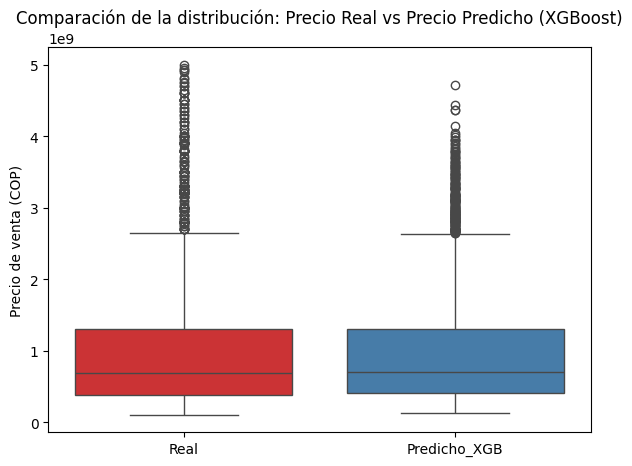

In [ ]:
datos_comparacion = pd.DataFrame({
    'Real': y_val,
    'Predicho_XGB': y_pred_val_xgb
})

# Convertir a formato largo para seaborn
data_long = pd.melt(datos_comparacion, var_name='Tipo', value_name='Precio')

# Gráfico
plt.figure(figsize=(7,5))
sns.boxplot(x='Tipo', y='Precio', data=data_long, palette='Set1')
plt.title('Comparación de la distribución: Precio Real vs Precio Predicho (XGBoost)')
plt.ylabel('Precio de venta (COP)')
plt.xlabel('')
plt.show()

De acuerdo con esta comparación, se observa que el modelo puede hacer una buena predicción respecto a los datos reales.

#Análisis cualitativo de resultados del modelo

In [ ]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled  = pd.DataFrame(X_test_scaled,  columns=X_test.columns,  index=X_test.index)
X_val_scaled   = pd.DataFrame(X_val_scaled,   columns=X_val.columns,   index=X_val.index)

In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 14.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=4b850fb0ddaf2396f5257f6dbc563cd66018b6c8fdbe66872414e970dc7d4a04
  Stored in directory: /root/.cache/pip/wheels/e7/5d/0e/4b4fff9a47468fed5633211fb3b76d1db43fe806a17fb7486a
Successfully built lime


In [ ]:
import lime
from lime import lime_tabular

lime_explainer = lime_tabular.LimeTabularExplainer(
    training_data=X_train_scaled.values,
    feature_names=X_train_scaled.columns.tolist(),
    mode='regression',
    discretize_continuous=True,
    random_state=42
)
def predict_en_millones(X):
    X_df = pd.DataFrame(X, columns=X_train_scaled.columns)
    y_pred = xgb_model.predict(X_df)
    return y_pred / 1000000

idx = 36

instance = X_val_scaled.iloc[idx].values

prediccion_xgb_mill = predict_en_millones(instance.reshape(1, -1))[0]
print(f"Predicción XGBoost (millones) para idx={idx}: {prediccion_xgb_mill:,.2f}")
print(f"Valor real (millones): {y_val.iloc[idx] / 1000000:,.2f}")

exp_xgb = lime_explainer.explain_instance(
    data_row=instance,
    predict_fn=predict_en_millones,
    num_features=6,
    num_samples=1000
)

exp_xgb.show_in_notebook(show_table=True)

Predicción XGBoost (millones) para idx=36: 762.61
Valor real (millones): 768.18


Especificamente en este caso, se observan las variables que pueden explicar o influir en el valor del precio de apartamentos. El hecho de tener piscina, estar en la localidad de Chapinero o Suba reducen el valor del apartamento en 340.000, 600.000 y 480.000 pesos respectivamente. Las variables, antiguedad más de 20 años, estrato 6 y baños aumentan el precio en  1.340.000, 1.140.000 y 1.010.000 respectivamente. Lo cual se encuentra en línea de acuerdo con las normas del negocio, estratos más altos y un mayor número de espacios puede elevar el precio. Además, otras zonas diferentes a Chapinero y Suba, pueden hacerlo, como por ejemplo Usaquen.

In [ ]:
!pip install shap

 99%|===================| 2699/2720 [01:21<00:00]       

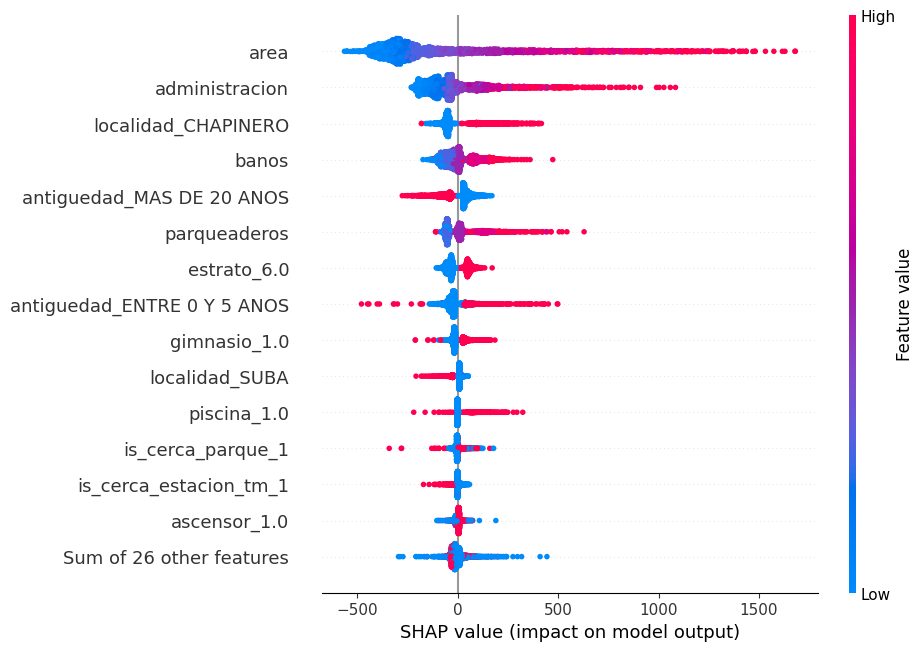

Valor real en el dataset: 639000000.0
Valor predicho por el modelo: 574129800.0


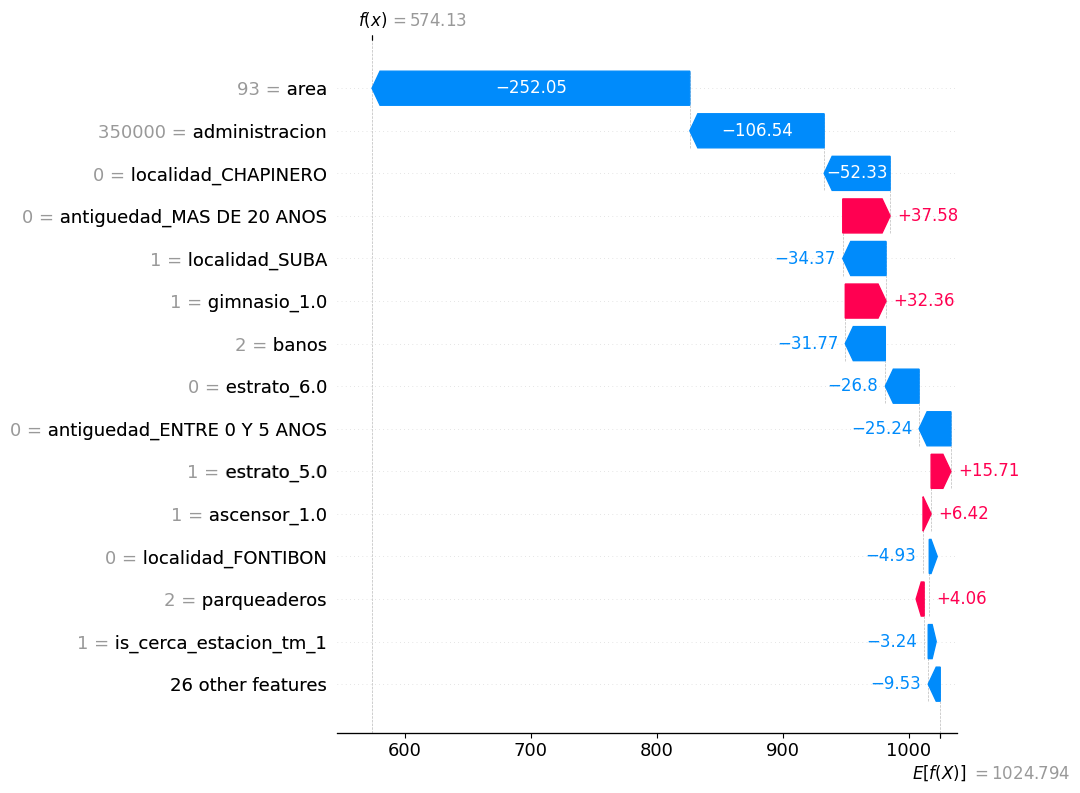

In [ ]:
import shap

shap.initjs()
explainer_xgb = shap.TreeExplainer(xgb_model, X_train_scaled, feature_names=X_train.columns)

shap_values_xgb = explainer_xgb(X_val_scaled, check_additivity=False)

shap_values_xgb.data = scaler.inverse_transform(X_val_scaled)

# escalar para que se vean pequeños los valores
shap_values_xgb.values = shap_values_xgb.values / 1e6
shap_values_xgb.base_values = shap_values_xgb.base_values / 1e6

shap.plots.beeswarm(shap_values_xgb, max_display=15)

#muestra a evaluar
sample_index = 50

print("Valor real en el dataset:", y_val.to_numpy()[sample_index])
print("Valor predicho por el modelo:", y_pred_val_xgb[sample_index])

plt.figure(figsize=(12, 7))
shap.plots.waterfall(
    shap_values_xgb[sample_index],
    max_display=15
)


De acuerdo con lo observado en valores shapley, es claro ver que valores más grandes en terminos de área, valor de administración, ubicación en Chapinero, parqueaderos disponibles y número de baños tienden a aumentar el valor de los inmuebles. Por otro lados las características que pueden disminuir este valor, se relacionan con ubicación en la localidad de Suba, una antiguedad mayor a 20 años y si hay cerca una estación de trasnporte masivo.
Respecto a un caso particular, la segunda gráfica muestra que efectivamente un area más pequeña puedes disminuir drásticamente el precio (-252 millones), asimismo un menor valor de administración lo hace. Es importante tener en cuenta que la media de administración es de ~840 mil pesos. Adicional a ello, tener gimnasio y ser de estrato 5, aumenta el valor.



#Generación de valor

HabitAlpes realiza 500 peritajes mesualmente para determinar el precio de un apartamento. Esta empresa, esta interesada en usar un modelo de ML que le permita predecir el valor de apartamentos en venta lo que posteriormente los lleve a disminuir el valor y las horas de peritaje.

In [ ]:
#Generar matriz, en este caso usaremos solo dos grupos
#Los que tienen un error por debajo de 20 millones y los que no, ya que los que tienen ese error van a requerir un peritaje completo (6h)

peritaje = y_pred_val_xgb - y_val
len(peritaje)

2720

De acuerdo con lo siguiente,se encuentra que cerca de un 36% de los casos evaluados, van a requerir un peritaje completo, dado a diferencia entre el valor real y el estimado, que se encuentra por debajo de los 20 millones. Además el ~64% logra sobreestimar o estar muy cerca del precio real, tal que no establece un desfase significativo.

In [ ]:
num_peritajes_extra = (peritaje < -20000000).sum()
p_peritaje_extra = num_peritajes_extra / len(peritaje)
print(f'número de peritajes extra: {num_peritajes_extra}')
print(f'porcentaje de peritajes extra: {p_peritaje_extra:.2%}')
no_peritaje_extra =  (peritaje >= -20000000).sum()
p_no_peritaje_extra = no_peritaje_extra/len(peritaje)
print(f'número de peritajes sin extra: {no_peritaje_extra}')
print(f'porcentaje de peritajes sin extra: {p_no_peritaje_extra:.2%}')

número de peritajes extra: 974
porcentaje de peritajes extra: 35.81%
número de peritajes sin extra: 1746
porcentaje de peritajes sin extra: 64.19%


Con relación a esto se estima lo siguiente:
a.Los costos de tiempo asociado a peritos,
b.El ahorro de tiempo teórico de su modelo,
c.El costo asociado a los errores de su modelo,
d.El ahorro real por estimación acertada y
e.El ROI tomando en cuenta los costos de desarrollo y despliegue de su modelo.

In [ ]:
Costo_hora_perito= 9500
tiempo_avaluo_sin_modelo= 6
tiempo_avaluo_con_modelo= 1
Valor_peritaje_sin_modelo= Costo_hora_perito*tiempo_avaluo_sin_modelo
Valor_peritaje_con_modelo= Costo_hora_perito*tiempo_avaluo_con_modelo
Valor_mes_sin_modelo = Valor_peritaje_sin_modelo*500 #500 (por la cantidad de valoraciones que se hacen al mes)
Valor_año_sin_modelo = Valor_mes_sin_modelo*12
print(f'Valor peritaje sin modelo: {Valor_peritaje_sin_modelo:,.0f}')
print(f'Valor peritaje con modelo: {Valor_peritaje_con_modelo:,.0f}')
print(f'Valor del mes sin modelo: {Valor_mes_sin_modelo:,.0f}')
print(f'Valor del año sin modelo: {Valor_año_sin_modelo:,.0f}')

Valor peritaje sin modelo: 57,000
Valor peritaje con modelo: 9,500
Valor del mes sin modelo: 28,500,000
Valor del año sin modelo: 342,000,000


Cada vez que HabitAlpes utiliza el modelo para valorar un apartamento, se espera un ahorro promedio de 30.491 pesos en horas de perito. Con esta estimación se logra obtener un valor total de lo que costaría usar el modelo al mes, lo cual sería de: ~13 millones de pesos, comparado cuando no se usa el modelo que es de ~28 millones de pesos. En tanto se logran reducir los costos en casi 15 millones de pesos al mes.

In [ ]:
# Ganacia esperada por estimación
Ahorro_peritaje_modelo_con_error = Valor_peritaje_sin_modelo - Valor_peritaje_sin_modelo #porque se solicita la presencia del perito por 6h
Ahorro_peritaje_modelo_sin_error = Valor_peritaje_sin_modelo - Valor_peritaje_con_modelo #acá el perito solo va 1h
print(f'Ahorro peritaje modelo con error: {Ahorro_peritaje_modelo_con_error:,.0f}')
print(f'Ahorro peritaje modelo sin error: {Ahorro_peritaje_modelo_sin_error:,.0f}')
Ahorro_real_peritaje_con_modelo = (((p_no_peritaje_extra) * Ahorro_peritaje_modelo_sin_error)+((p_peritaje_extra) * Ahorro_peritaje_con_error))
print(f'Valor ahorro en peritaje por estimación con modelo: {Ahorro_real_peritaje_con_modelo}')

Ahorro peritaje modelo con error: 0
Ahorro peritaje modelo sin error: 47,500
Valor ahorro en peritaje por estimación con modelo: 30490.808823529413


In [ ]:
Ahorro_al_mes_con_modelo= Ahorro_real_peritaje_con_modelo*500 #500 (por la cantidad de valoraciones que se hacen al mes) #valor total de cuando se usa el modelo
Ahorro_al_año_con_modelo= Ahorro_al_mes_con_modelo*12
print(f'Ahorro al mes con modelo: {Ahorro_al_mes_con_modelo:,.0f}')
print(f'Ahorro al año con modelo: {Ahorro_al_año_con_modelo:,.0f}')
Valor_al_usar_modelo= Valor_mes_sin_modelo-Ahorro_al_mes_con_modelo
print(f'Valor mensual con modelo: {Valor_al_usar_modelo:,.0f}')

Ahorro al mes con modelo: 15,245,404
Ahorro al año con modelo: 182,944,853
Valor mensual con modelo: 13,254,596


#Detección del ROI

Ahora se propondrá una inversión estimada de los costos de desarrollo y despliegue del modelo. Haciendo una estimación, se requiere un científico de datos (DS) que realicé esta tarea, que sería por un tiempo de 4 meses. El valor de un DS esta alrededor de 8 millones de pesos, por lo que esto daría un valor total de 32 millones de pesos. Adicional a esto, se requiere infraestructura que incluye, almacenamiento en la nube y licencias, por un valor de 20 millones de pesos. Con relación a esto, el modelo total, costaría 52 millones de pesos. Esa sería la inversión general. Esto teniendo en cuenta que esta persona no haría mantenimiento y se tendría que evaluar la posibilidad de moniotrear el modelo en el tiempo.

ROI=return/investment

In [ ]:
investment = 52000000
Return = Ahorro_al_año_con_modelo
print(f'Return: {Return:,.0f}')

Return: 182,944,853


In [ ]:
ROI = Return/investment
print(f'ROI: {ROI:.2}')

ROI: 3.5


El valor de ejecutar el modelo en un año es de 159,055,147 pesos y ejecutar este proceso sin modelo cuesta 342,000,000, el ahorro anual es de 182,944,853. La implementación del modelo cuesta 52 millones de pesos. A partir de estos dos valores ahorro anual e investment se obtiene el ROI, el cual nos dice que en el primer año se recupera la inversión del modelo y adicional a eso se obtienen como utilidades ~3 veces la inversión total de este. Lo cual resulta rentable para la empresa, porque lo próximo que se estime, ya no tiene un costo tan elevado.  

# Nota: Los Insights se encuentran en el informe ejecutivo